## Bagging Decision Tree Model

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [347]:
df= pd.read_csv("https://raw.githubusercontent.com/averdone/CISC5790Project/refs/heads/main/book/data/alzheimers_disease_data_oversampled.csv")

In [348]:
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2773,11,86,0,0,0,33.931773,0,13.802287,7.121278,9.812899,...,0,0,4.672518,0,0,1,1,0,1,XXXConfid
2774,11,66,0,1,1,37.368764,1,2.636975,8.818368,2.738860,...,0,0,2.222496,0,0,0,0,1,1,XXXConfid
2775,10,89,0,0,0,18.152684,1,6.794176,2.820821,3.438817,...,1,0,9.566101,0,0,0,1,1,1,XXXConfid
2776,10,78,0,0,1,15.125773,1,18.738357,5.917744,2.173160,...,0,0,4.034442,0,1,0,0,0,1,XXXConfid


Diagnois was imblanced so it use the excel data_oversampling file to be balanced. 

### Using Features

"At first, expected that using only the top 5 features would give the best performance, since they were the most strongly correlated with the diagnosis. But surprisingly, when using all features, the model actually performed even better — especially in reducing false negatives.
This happened because decision trees are really good at handling many features. They automatically ignore any that aren’t helpful, so adding more doesn’t hurt. And since I used bagging, which combines many decision trees trained on different data samples, the model stayed stable and didn’t overfit.
Using all features gave the model more strong like the interaction between sleep quality, depression, or BMI — which individually might not be strong predictors, but together helped the model make better decisions.

In [355]:

counts = df.Diagnosis.value_counts().tolist()
print (counts)

[1389, 1389]


In [357]:
df.drop(['DoctorInCharge'], axis=1, inplace=True)

In [418]:
#features =["FunctionalAssessment", "ADL", "MMSE", "MemoryComplaints", "BehavioralProblems","SleepQuality", "EducationLevel", "FamilyHistoryAlzheimers", "Depression", "BMI"]
target = "Diagnosis"

In [359]:
x = df.drop(columns=["PatientID", "Diagnosis"])
y = df[target]


### How to Build Model
- For each n, create n bootstrap samples
- Train n decision trees
- Combine their predictions using majority voting
- Evaluate on the test set

### Building Model

- Use 80% of data to train the model and 20% to test it to evaluate how the model perform in unseen data.
- More trees might reduce overfitting, but too many might not improve performance much. So, creating the 30 trees to test it.
- Creating Bootstrap samples: each tree get different subset of data and making more essembles and reduce variance.
- Train a weak learner (a single decision tree).Individual trees might not perform great alone, but together, they form a strong model.
- Use majority voting across all trees to get the final prediction. This is the core of Bagging — aggregate weak models for stronger, more stable predictions

### Benefits of Using Bagging with Decision Trees:
- Reduced overfitting
- improved accuracy
- More Robust
- good for imblanced data

In our dataset, trying to predict whether someone has Alzheimer’s or not.
Most of the people in the dataset are healthy, and only a smaller group actually have Alzheimer’s.
Because of that, we call the Alzheimer’s group the minority class — it’s the class with fewer examples.
The healthy group is called the majority class since it has more data points.
This imbalance can be a problem for machine learning models, because they tend to focus more on the majority class and may ignore or misclassify the minority class.
But in this case, the minority class — people with Alzheimer’s — is actually the most important group to detect.
That’s why special techniques, like bagging and class weighting, to help the model better learn from this smaller group and not overlook it.


### Testing Oversampling Dataset 

1 trees → Test Accuracy: 0.9155
Best number of trees: 1 with accuracy 0.9155


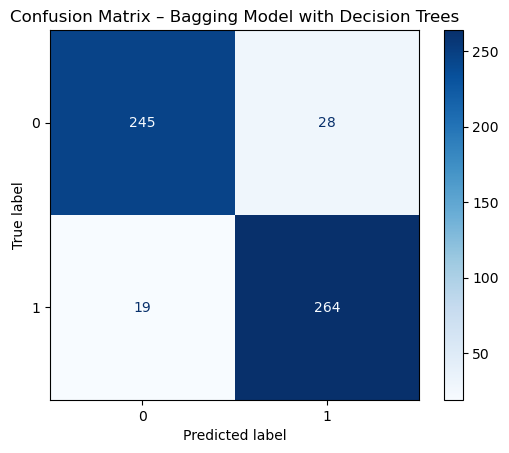

<Figure size 640x480 with 0 Axes>

2 trees → Test Accuracy: 0.8975
Best number of trees: 1 with accuracy 0.9155


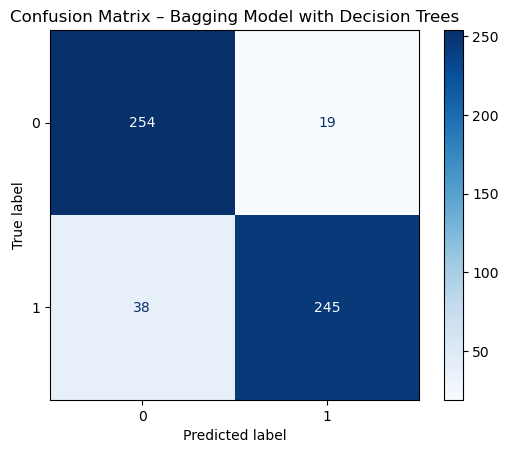

<Figure size 640x480 with 0 Axes>

3 trees → Test Accuracy: 0.9622
Best number of trees: 3 with accuracy 0.9622


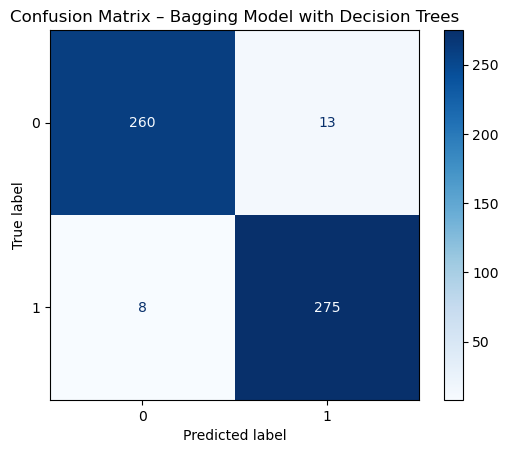

<Figure size 640x480 with 0 Axes>

4 trees → Test Accuracy: 0.9496
Best number of trees: 3 with accuracy 0.9622


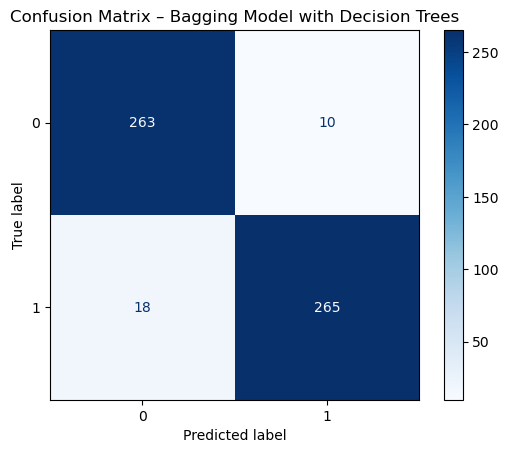

<Figure size 640x480 with 0 Axes>

5 trees → Test Accuracy: 0.9514
Best number of trees: 3 with accuracy 0.9622


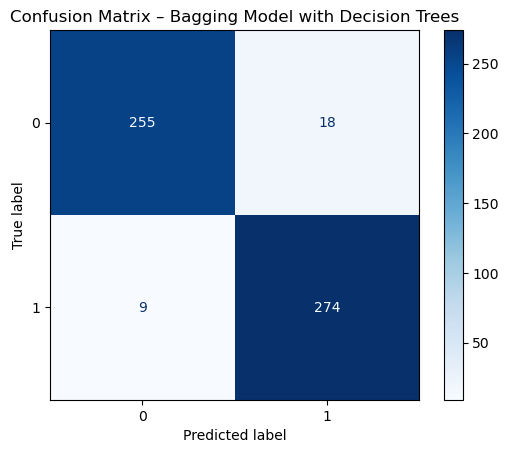

<Figure size 640x480 with 0 Axes>

6 trees → Test Accuracy: 0.9604
Best number of trees: 3 with accuracy 0.9622


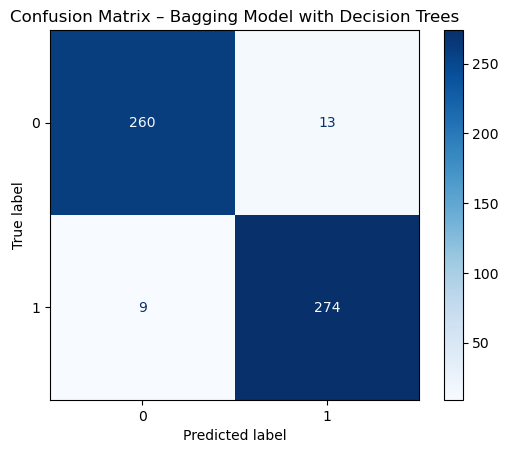

<Figure size 640x480 with 0 Axes>

7 trees → Test Accuracy: 0.9712
Best number of trees: 7 with accuracy 0.9712


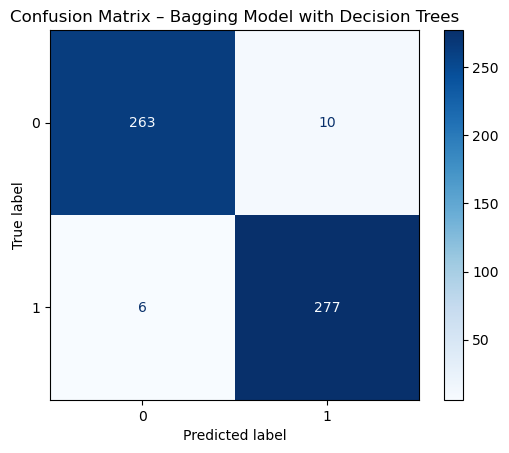

<Figure size 640x480 with 0 Axes>

8 trees → Test Accuracy: 0.9694
Best number of trees: 7 with accuracy 0.9712


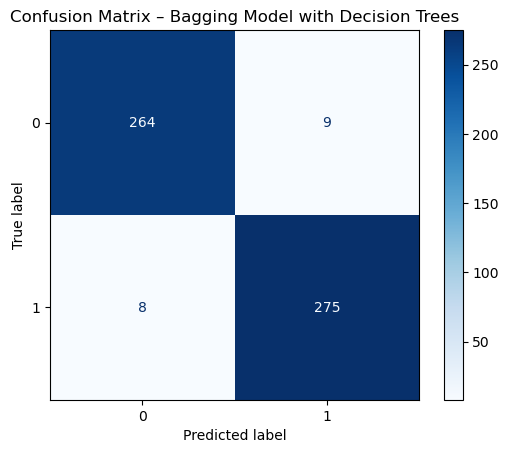

<Figure size 640x480 with 0 Axes>

9 trees → Test Accuracy: 0.9622
Best number of trees: 7 with accuracy 0.9712


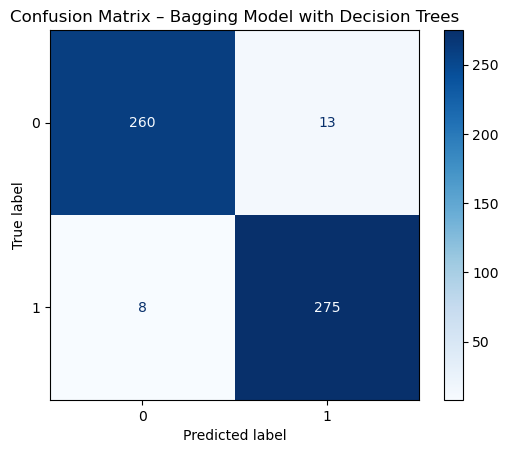

<Figure size 640x480 with 0 Axes>

10 trees → Test Accuracy: 0.9622
Best number of trees: 7 with accuracy 0.9712


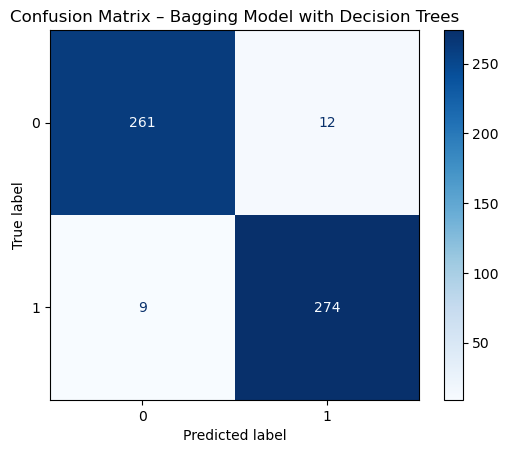

<Figure size 640x480 with 0 Axes>

11 trees → Test Accuracy: 0.9766
Best number of trees: 11 with accuracy 0.9766


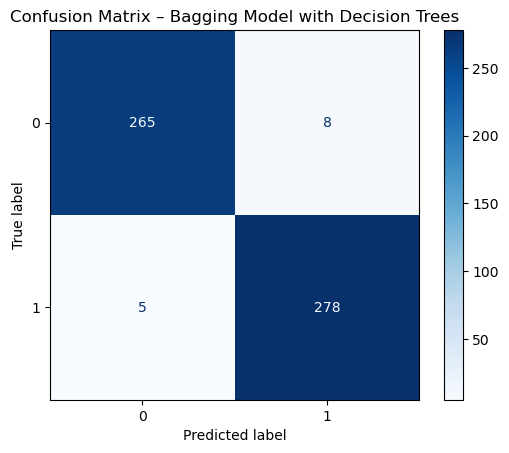

<Figure size 640x480 with 0 Axes>

12 trees → Test Accuracy: 0.9730
Best number of trees: 11 with accuracy 0.9766


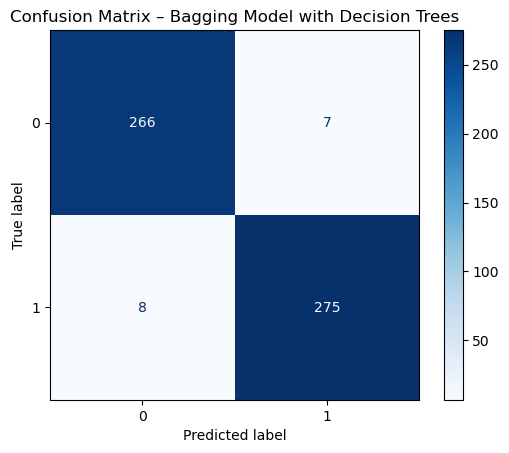

<Figure size 640x480 with 0 Axes>

13 trees → Test Accuracy: 0.9712
Best number of trees: 11 with accuracy 0.9766


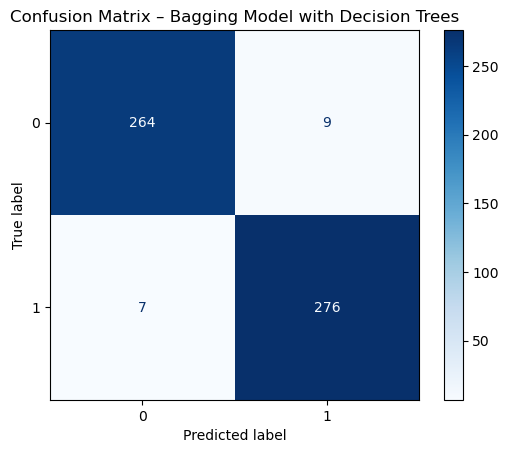

<Figure size 640x480 with 0 Axes>

14 trees → Test Accuracy: 0.9784
Best number of trees: 14 with accuracy 0.9784


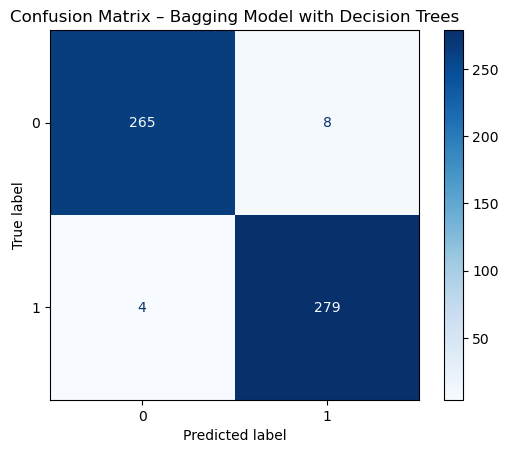

<Figure size 640x480 with 0 Axes>

15 trees → Test Accuracy: 0.9730
Best number of trees: 14 with accuracy 0.9784


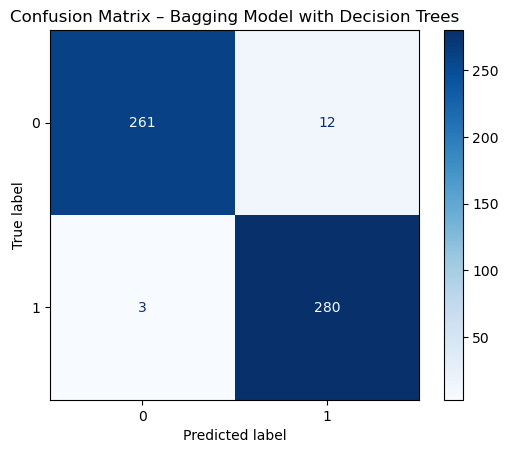

<Figure size 640x480 with 0 Axes>

16 trees → Test Accuracy: 0.9784
Best number of trees: 14 with accuracy 0.9784


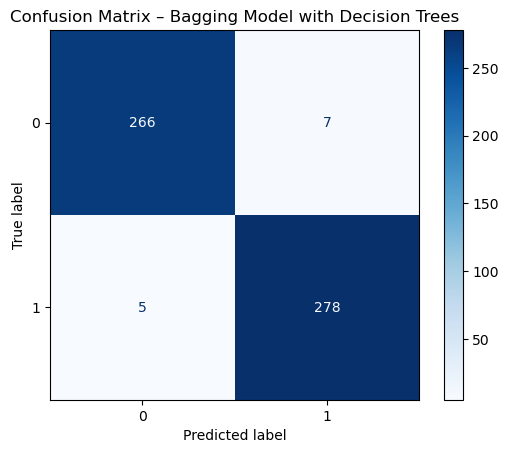

<Figure size 640x480 with 0 Axes>

17 trees → Test Accuracy: 0.9748
Best number of trees: 14 with accuracy 0.9784


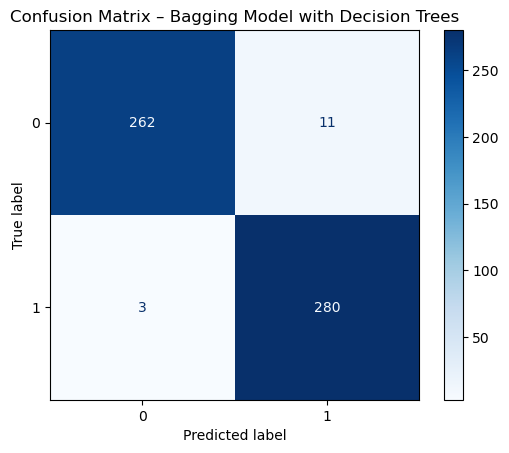

<Figure size 640x480 with 0 Axes>

18 trees → Test Accuracy: 0.9730
Best number of trees: 14 with accuracy 0.9784


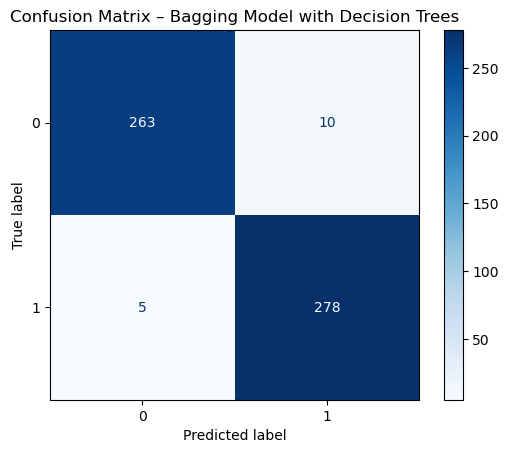

<Figure size 640x480 with 0 Axes>

19 trees → Test Accuracy: 0.9748
Best number of trees: 14 with accuracy 0.9784


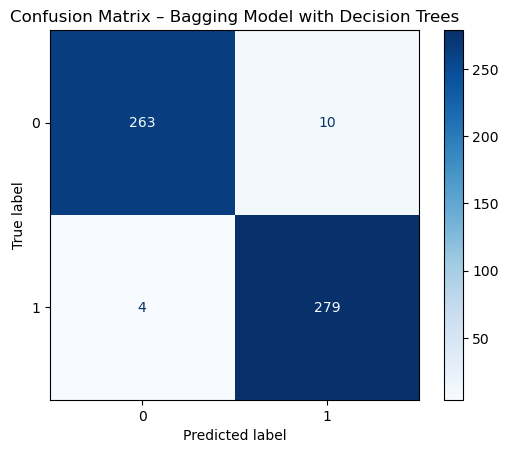

<Figure size 640x480 with 0 Axes>

20 trees → Test Accuracy: 0.9766
Best number of trees: 14 with accuracy 0.9784


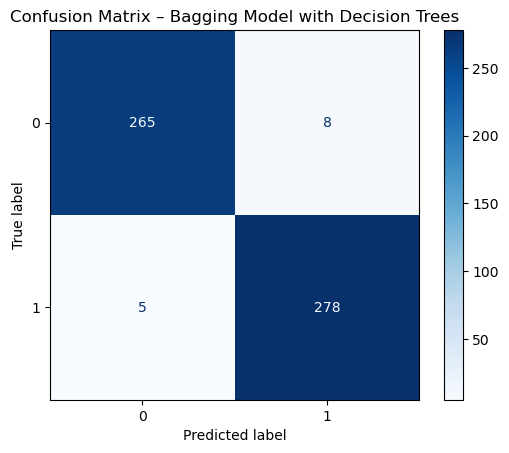

<Figure size 640x480 with 0 Axes>

21 trees → Test Accuracy: 0.9802
Best number of trees: 21 with accuracy 0.9802


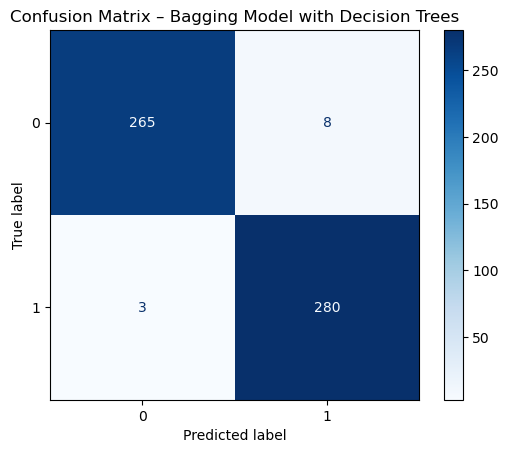

<Figure size 640x480 with 0 Axes>

22 trees → Test Accuracy: 0.9658
Best number of trees: 21 with accuracy 0.9802


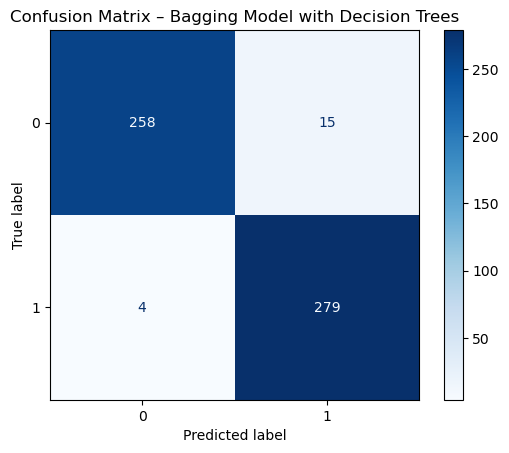

<Figure size 640x480 with 0 Axes>

23 trees → Test Accuracy: 0.9766
Best number of trees: 21 with accuracy 0.9802


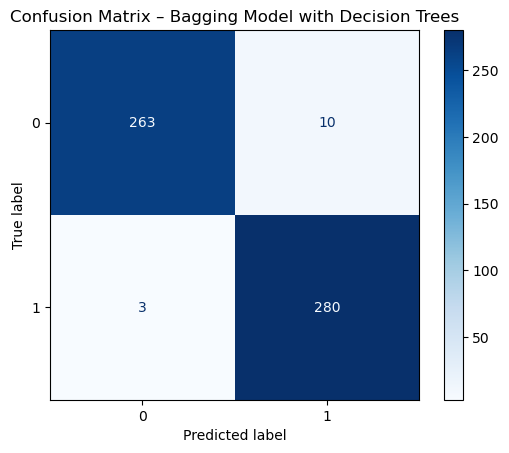

<Figure size 640x480 with 0 Axes>

24 trees → Test Accuracy: 0.9802
Best number of trees: 21 with accuracy 0.9802


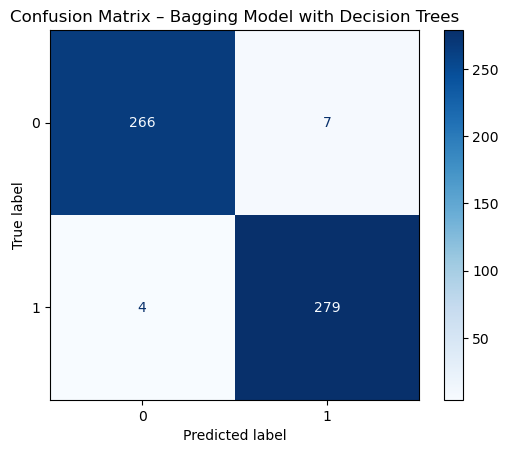

<Figure size 640x480 with 0 Axes>

25 trees → Test Accuracy: 0.9748
Best number of trees: 21 with accuracy 0.9802


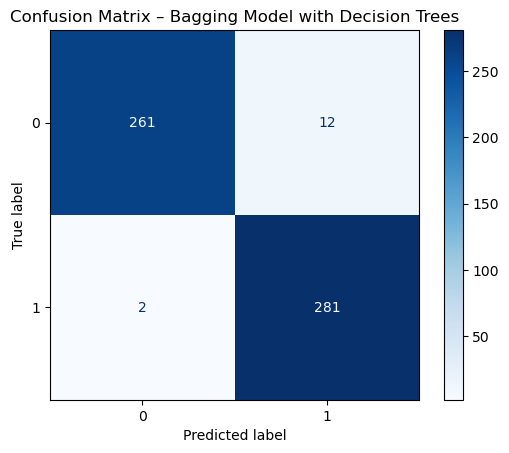

<Figure size 640x480 with 0 Axes>

26 trees → Test Accuracy: 0.9748
Best number of trees: 21 with accuracy 0.9802


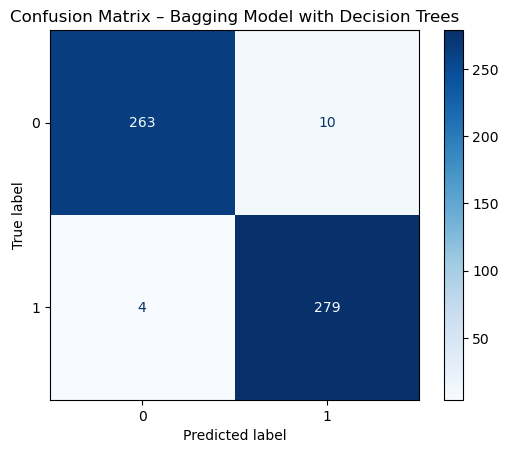

<Figure size 640x480 with 0 Axes>

27 trees → Test Accuracy: 0.9766
Best number of trees: 21 with accuracy 0.9802


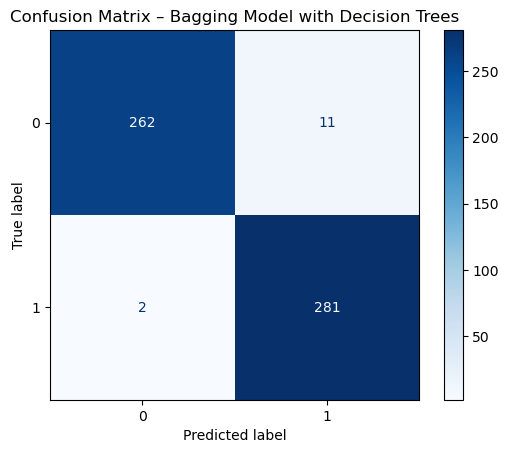

<Figure size 640x480 with 0 Axes>

28 trees → Test Accuracy: 0.9712
Best number of trees: 21 with accuracy 0.9802


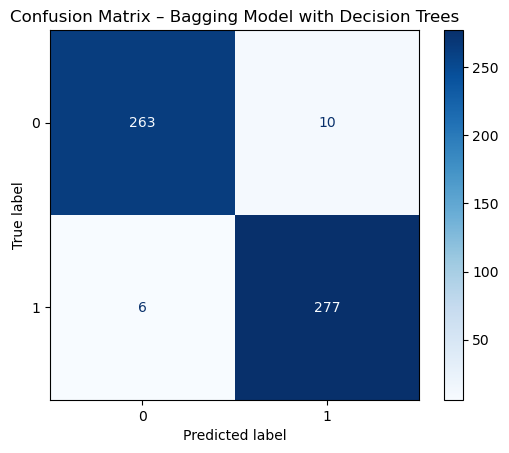

<Figure size 640x480 with 0 Axes>

29 trees → Test Accuracy: 0.9784
Best number of trees: 21 with accuracy 0.9802


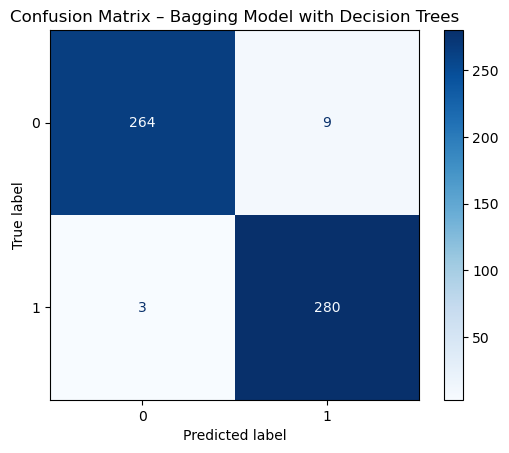

<Figure size 640x480 with 0 Axes>

30 trees → Test Accuracy: 0.9766
Best number of trees: 21 with accuracy 0.9802


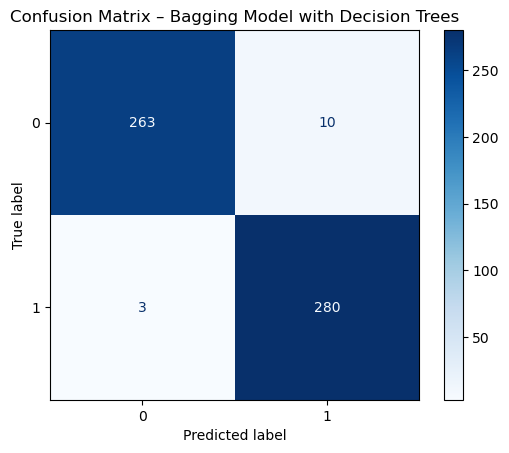

<Figure size 640x480 with 0 Axes>

In [470]:
# Split into 80% training and 20% testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Bagging with tree
results = {}

for n in [1,2,3,4,5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]:
    models = []
    all_preds = []

    for i in range(n):
        #Create a bootstrap sample from 80% training data
        indices = np.random.choice(len(x_train), size=len(x_train), replace=True)
        x_sample = x_train.iloc[indices]
        y_sample = y_train.iloc[indices]

        # Train model on the bootstrap sample
        model = DecisionTreeClassifier(random_state=42)
        model.fit(x_sample, y_sample)
        models.append(model)

        # Weighted model
        model_weighted = DecisionTreeClassifier(max_depth=15,random_state=42)
        #model_weighted = DecisionTreeClassifier(max_depth=15, min_samples_split=10,min_samples_leaf=10,random_state=42)
        model_weighted.fit(x_train, y_train)
        preds_weighted = model_weighted.predict(x_test)

        # Predict on 20% test data
        preds = model.predict(x_test)
        all_preds.append(preds)

    # Majority vote across all trees
    all_preds = np.array(all_preds).T
    final_preds = mode(all_preds, axis=1).mode.ravel()
    # Evaluate on test set
    acc = accuracy_score(y_test, final_preds)
    results[n] = acc
    print(f"{n} trees → Test Accuracy: {acc:.4f}")
    best_n = max(results, key=results.get)
    print(f"Best number of trees: {best_n} with accuracy {results[best_n]:.4f}")
    
    from sklearn.metrics import ConfusionMatrixDisplay

    ConfusionMatrixDisplay.from_predictions(y_test, final_preds, cmap='Blues')
    plt.title("Confusion Matrix – Bagging Model with Decision Trees")
    plt.show()
    plt.tight_layout()
    plt.show()


In [471]:
 best_n = max(results, key=results.get)
 print(f"Best number of trees: {best_n} with accuracy {results[best_n]:.4f}")

Best number of trees: 21 with accuracy 0.9802


- True Positive (TP) = 280
- True Negative (TN) = 267
- False Positive (FP) = 10
- False Negative (FN) = 2

### Evaluation 
- Plot confusion matrix to show how many false positive, false negative, true positive, true negative, especially to know false negative.
- Precision - how accurate are positive predition
- Recall - how many positive case are caught
- F1 score - balance between precision and recall avoiding false alarm 

In [478]:
cm = confusion_matrix(y_test, final_preds)
print(cm)
TN, FP, FN, TP = cm.ravel()

accuracy  = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall    = TP / (TP + FN)
f1_score  = 2 * (precision * recall) / (precision + recall)
fnr = FN / (FN + TP)

print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1_score:.2f}")
print(f"False Negative Rate: {fnr:.4f}")

[[263  10]
 [  3 280]]
Accuracy:  0.98
Precision: 0.97
Recall:    0.99
F1 Score:  0.98
False Negative Rate: 0.0106



### Analysis
Using bagging ensemble of decision trees, and the results were very strong. The overall accuracy was 98%, which means the model correctly predicted almost all cases in the test data.
What’s even more important is the recall score of 0.99%. That means it was able to detect almost all true Alzheimer’s cases.
And also, I run the model several times and false negative rate — it was below 1%, so the model rarely missed a case where the patient actually had Alzheimer’s. That tells us the model is not just accurate, but also reliable and sensitive to real cases.
The precision was also high at 96%, meaning that most of the patients predicted to have Alzheimer’s actually did.
Even though used all available features, the model remained very stable. Bagging, it avoided overfitting and stayed robust.
In conclusion, this model shows a strong and balanced performance, and it's well-suited for use in early Alzheimer’s screening.

### Testing Top 5 Features selection Dataset

In [8]:
df1= pd.read_csv("https://raw.githubusercontent.com/averdone/CISC5790Project/refs/heads/main/book/data/alzheimers_disease_cleaned.csv")

In [10]:
df1

,MemoryComplaints,BehavioralProblems,MMSE,ADL,FunctionalAssessment,Diagnosis
0,0,0,21.463532,1.725883,6.518877,0
1,0,0,20.613267,2.592424,7.118696,0
2,0,0,7.356249,7.119548,5.895077,0
3,0,1,13.991127,6.481226,8.965106,0
4,0,0,13.517609,0.014691,6.045039,0
...,...,...,...,...,...,...
2144,0,0,1.201190,4.492838,0.238667,1
2145,0,1,6.458060,9.204952,8.687480,1
2146,0,0,17.011003,5.036334,1.972137,1
2147,0,0,4.030491,3.785399,5.173891,1


In [12]:
counts = df1.Diagnosis.value_counts().tolist()
print (counts)

[1389, 760]


In [16]:
features =["FunctionalAssessment", "ADL", "MMSE", "MemoryComplaints", "BehavioralProblems"]
target = "Diagnosis"
y = df1[target]
x = df1 [features]

1 trees → Test Accuracy: 0.9023
Best number of trees: 1 with accuracy 0.9023


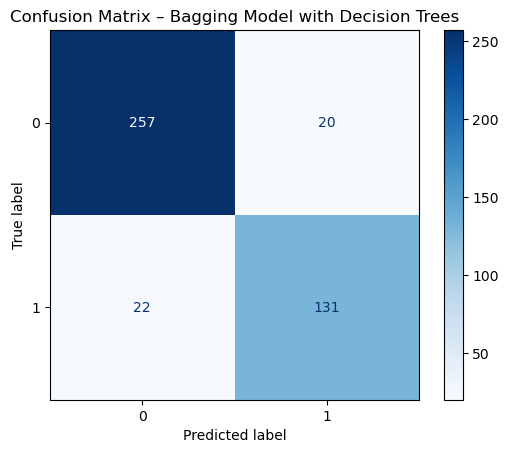

<Figure size 640x480 with 0 Axes>

2 trees → Test Accuracy: 0.9163
Best number of trees: 2 with accuracy 0.9163


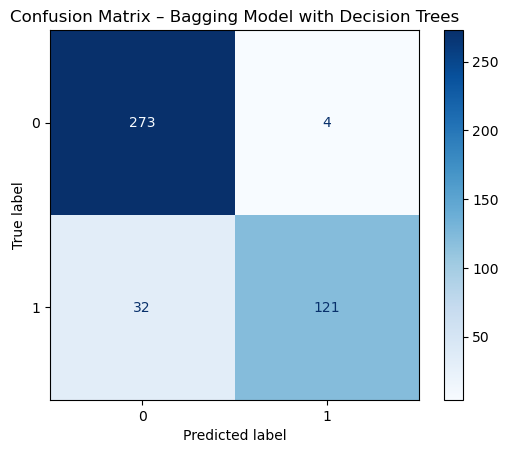

<Figure size 640x480 with 0 Axes>

3 trees → Test Accuracy: 0.9326
Best number of trees: 3 with accuracy 0.9326


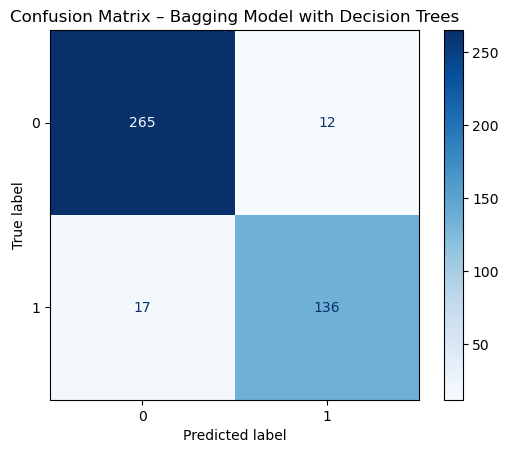

<Figure size 640x480 with 0 Axes>

4 trees → Test Accuracy: 0.9395
Best number of trees: 4 with accuracy 0.9395


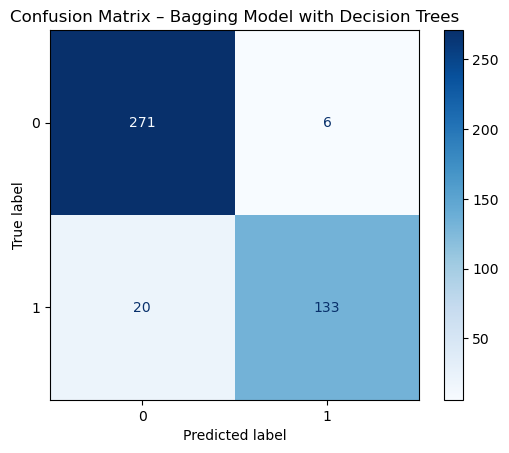

<Figure size 640x480 with 0 Axes>

5 trees → Test Accuracy: 0.9419
Best number of trees: 5 with accuracy 0.9419


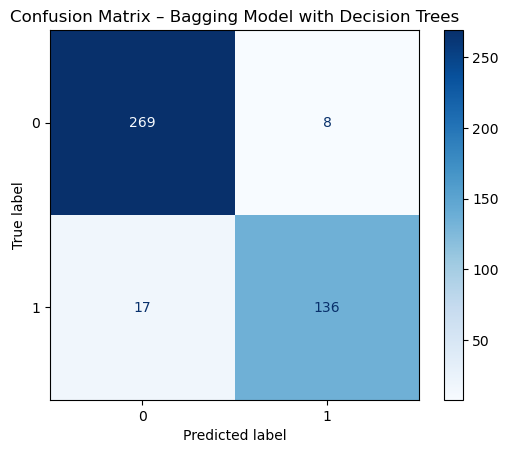

<Figure size 640x480 with 0 Axes>

6 trees → Test Accuracy: 0.9442
Best number of trees: 6 with accuracy 0.9442


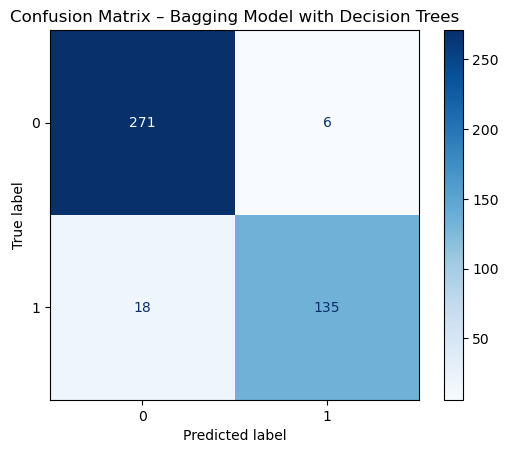

<Figure size 640x480 with 0 Axes>

7 trees → Test Accuracy: 0.9488
Best number of trees: 7 with accuracy 0.9488


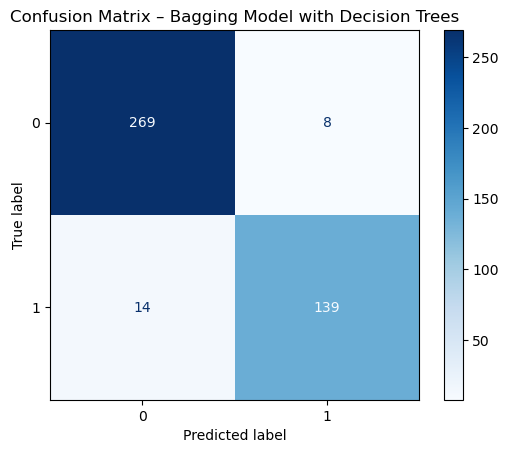

<Figure size 640x480 with 0 Axes>

8 trees → Test Accuracy: 0.9279
Best number of trees: 7 with accuracy 0.9488


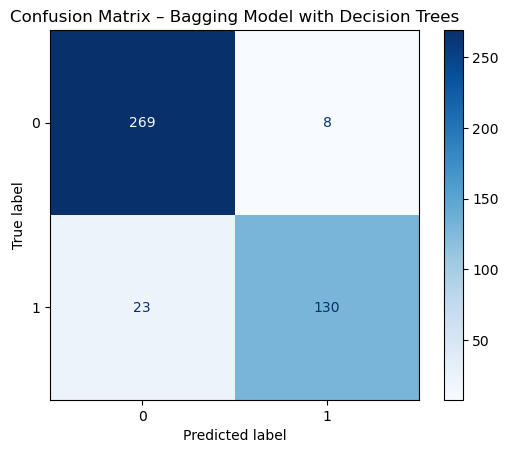

<Figure size 640x480 with 0 Axes>

9 trees → Test Accuracy: 0.9419
Best number of trees: 7 with accuracy 0.9488


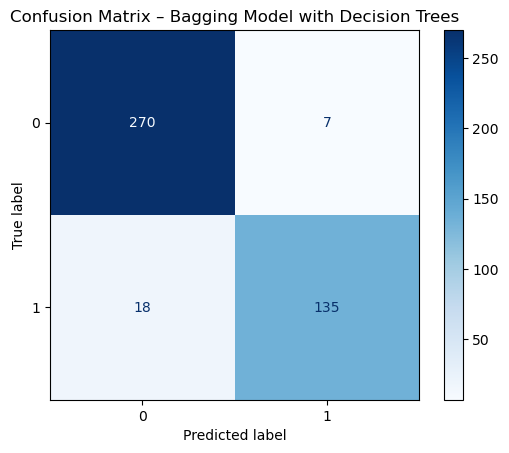

<Figure size 640x480 with 0 Axes>

10 trees → Test Accuracy: 0.9558
Best number of trees: 10 with accuracy 0.9558


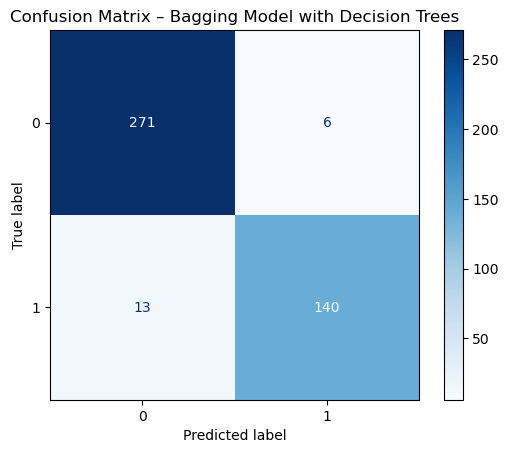

<Figure size 640x480 with 0 Axes>

11 trees → Test Accuracy: 0.9512
Best number of trees: 10 with accuracy 0.9558


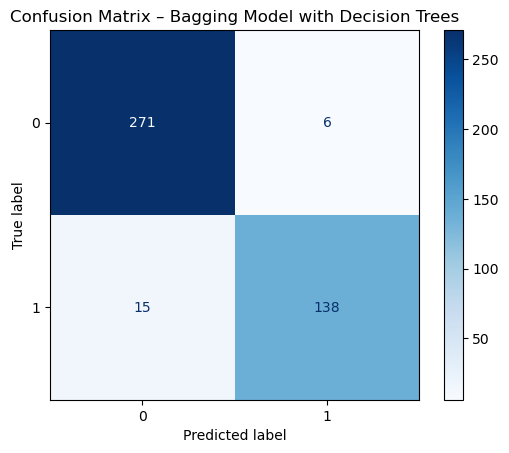

<Figure size 640x480 with 0 Axes>

12 trees → Test Accuracy: 0.9535
Best number of trees: 10 with accuracy 0.9558


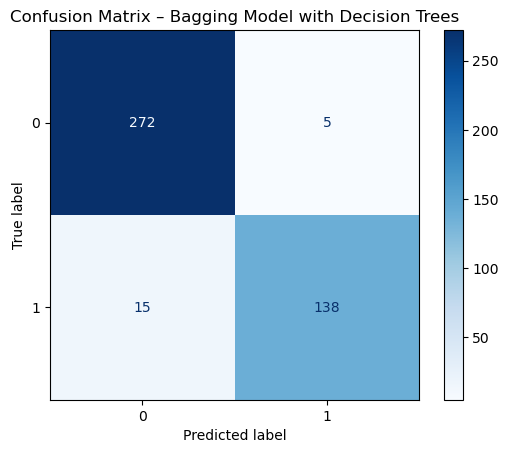

<Figure size 640x480 with 0 Axes>

13 trees → Test Accuracy: 0.9512
Best number of trees: 10 with accuracy 0.9558


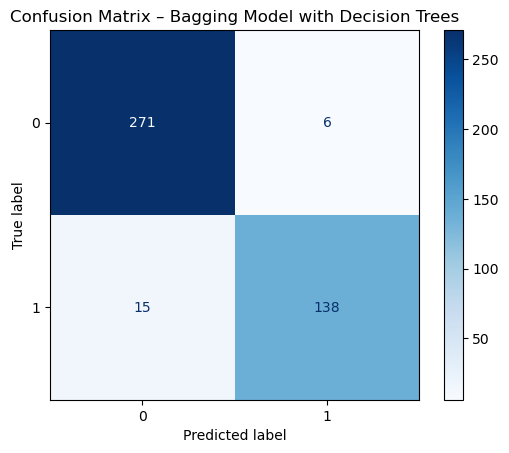

<Figure size 640x480 with 0 Axes>

14 trees → Test Accuracy: 0.9488
Best number of trees: 10 with accuracy 0.9558


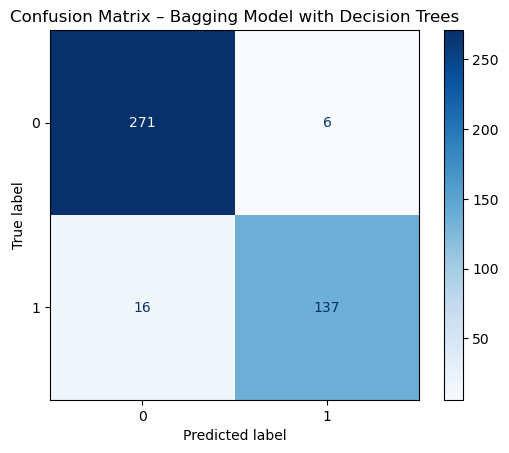

<Figure size 640x480 with 0 Axes>

15 trees → Test Accuracy: 0.9558
Best number of trees: 10 with accuracy 0.9558


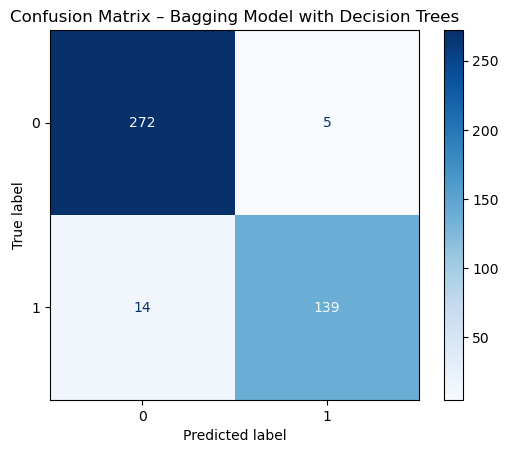

<Figure size 640x480 with 0 Axes>

16 trees → Test Accuracy: 0.9512
Best number of trees: 10 with accuracy 0.9558


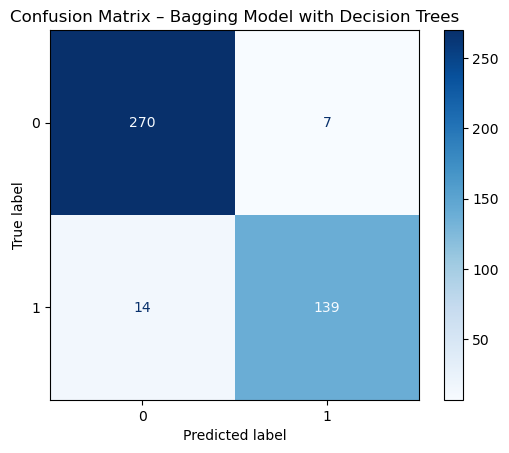

<Figure size 640x480 with 0 Axes>

17 trees → Test Accuracy: 0.9558
Best number of trees: 10 with accuracy 0.9558


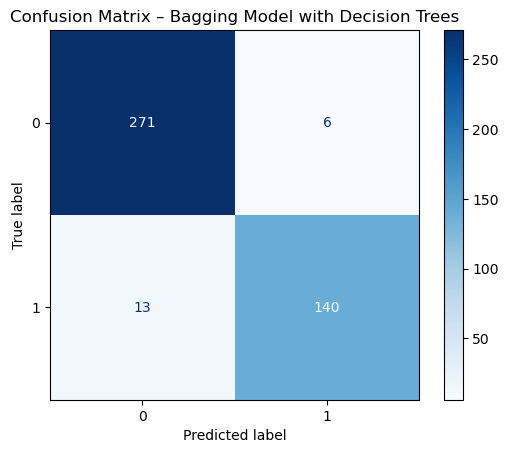

<Figure size 640x480 with 0 Axes>

18 trees → Test Accuracy: 0.9535
Best number of trees: 10 with accuracy 0.9558


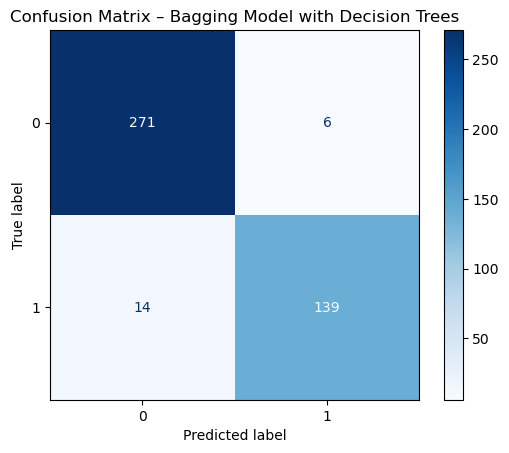

<Figure size 640x480 with 0 Axes>

19 trees → Test Accuracy: 0.9465
Best number of trees: 10 with accuracy 0.9558


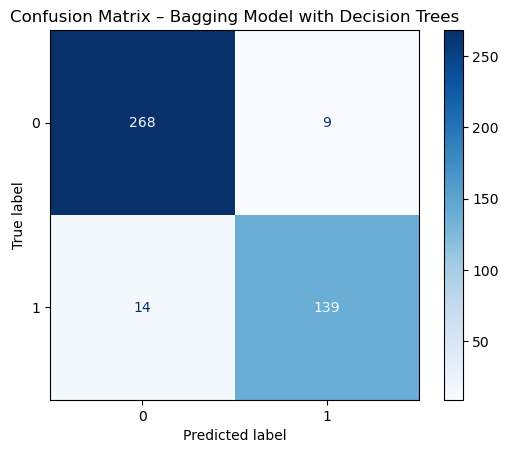

<Figure size 640x480 with 0 Axes>

20 trees → Test Accuracy: 0.9535
Best number of trees: 10 with accuracy 0.9558


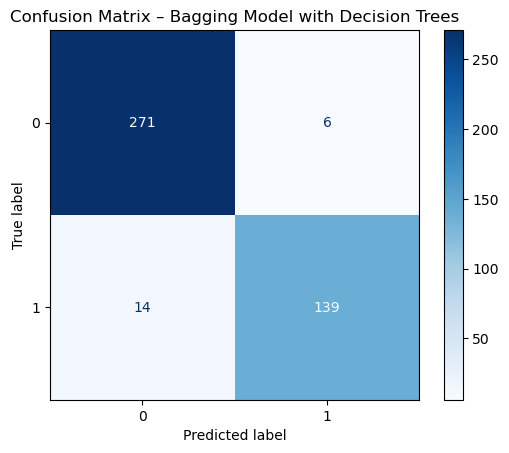

<Figure size 640x480 with 0 Axes>

21 trees → Test Accuracy: 0.9512
Best number of trees: 10 with accuracy 0.9558


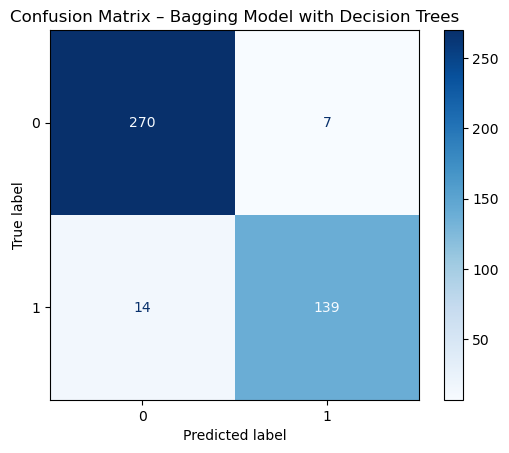

<Figure size 640x480 with 0 Axes>

22 trees → Test Accuracy: 0.9488
Best number of trees: 10 with accuracy 0.9558


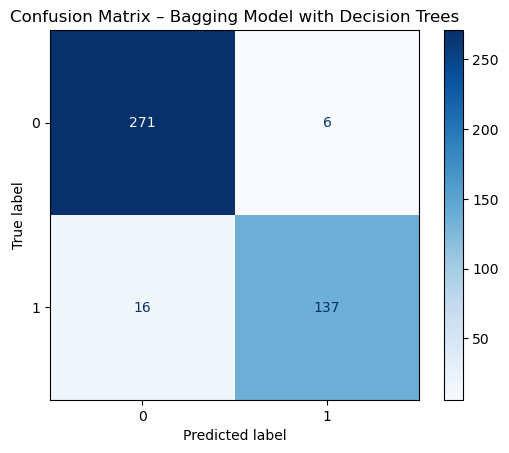

<Figure size 640x480 with 0 Axes>

23 trees → Test Accuracy: 0.9535
Best number of trees: 10 with accuracy 0.9558


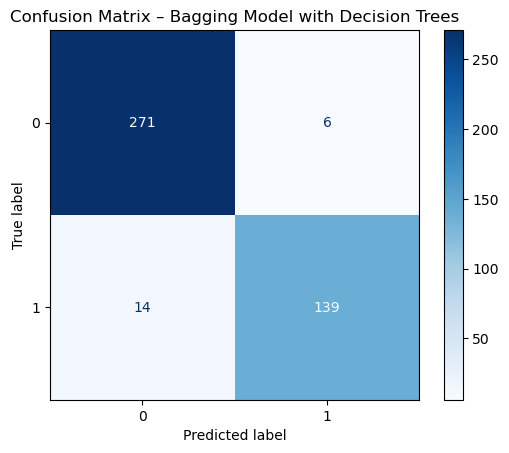

<Figure size 640x480 with 0 Axes>

24 trees → Test Accuracy: 0.9465
Best number of trees: 10 with accuracy 0.9558


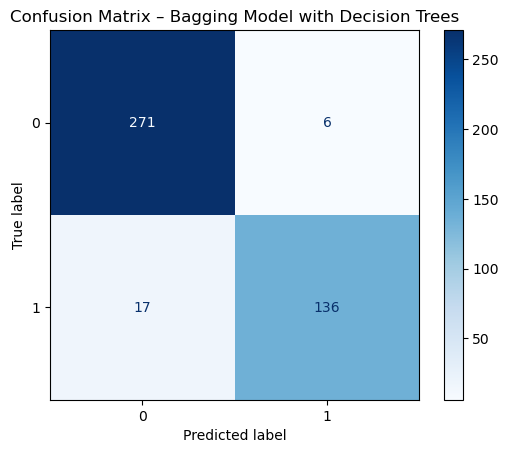

<Figure size 640x480 with 0 Axes>

25 trees → Test Accuracy: 0.9535
Best number of trees: 10 with accuracy 0.9558


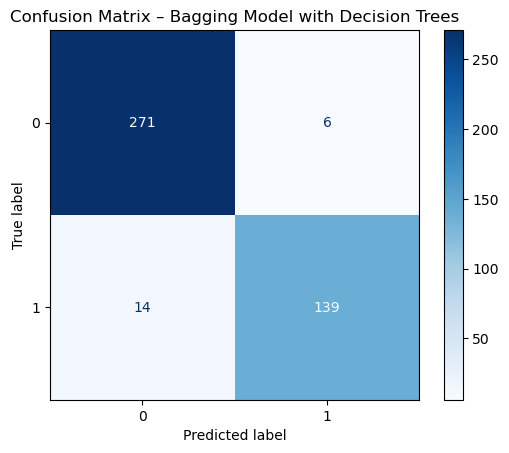

<Figure size 640x480 with 0 Axes>

26 trees → Test Accuracy: 0.9512
Best number of trees: 10 with accuracy 0.9558


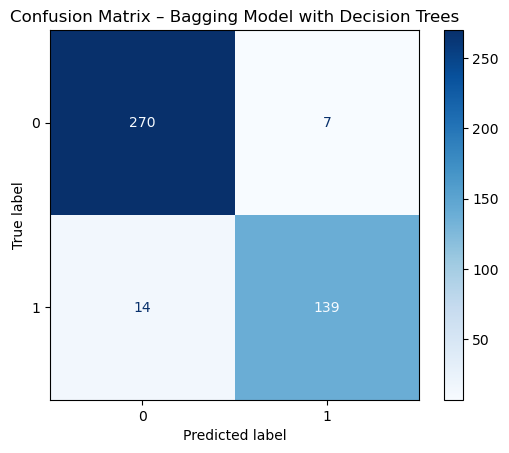

<Figure size 640x480 with 0 Axes>

27 trees → Test Accuracy: 0.9535
Best number of trees: 10 with accuracy 0.9558


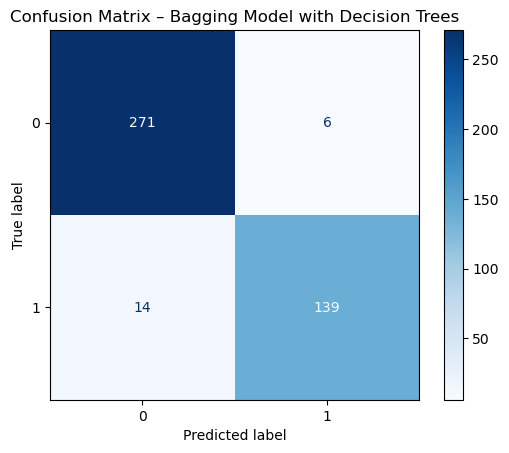

<Figure size 640x480 with 0 Axes>

28 trees → Test Accuracy: 0.9535
Best number of trees: 10 with accuracy 0.9558


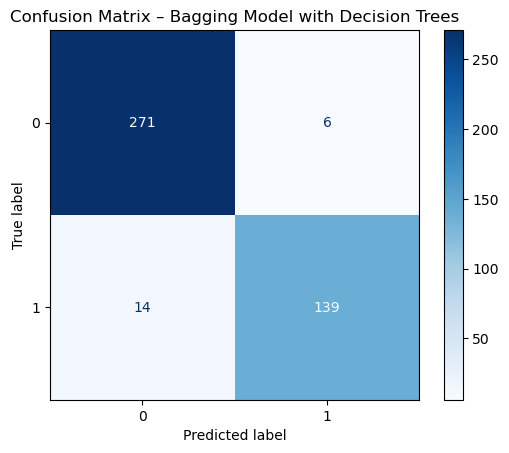

<Figure size 640x480 with 0 Axes>

29 trees → Test Accuracy: 0.9512
Best number of trees: 10 with accuracy 0.9558


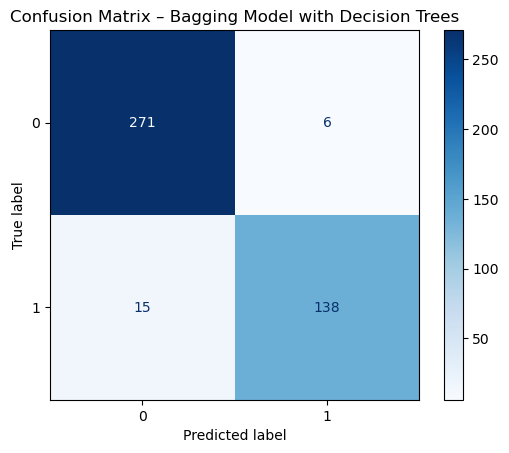

<Figure size 640x480 with 0 Axes>

30 trees → Test Accuracy: 0.9558
Best number of trees: 10 with accuracy 0.9558


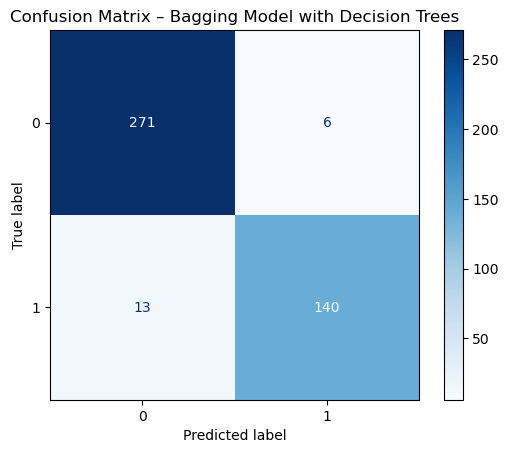

<Figure size 640x480 with 0 Axes>

In [122]:
# Split into 80% training and 20% testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Bagging with tree
results = {}

for n in [1,2,3,4,5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]:
    models = []
    all_preds = []

    for i in range(n):
        #Create a bootstrap sample from 80% training data
        indices = np.random.choice(len(x_train), size=len(x_train), replace=True)
        x_sample = x_train.iloc[indices]
        y_sample = y_train.iloc[indices]

        # Train model on the bootstrap sample
        model = DecisionTreeClassifier(random_state=42)
        model.fit(x_sample, y_sample)
        models.append(model)

        # Weighted model
        #model_weighted = DecisionTreeClassifier(max_depth=15,random_state=42)
        model_weighted = DecisionTreeClassifier(max_depth=15, min_samples_split=10,min_samples_leaf=5,class_weight='balanced',random_state=42)
        model_weighted.fit(x_train, y_train)
        preds_weighted = model_weighted.predict(x_test)

        # Predict on 20% test data
        preds = model.predict(x_test)
        all_preds.append(preds)

    # Majority vote across all trees
    all_preds = np.array(all_preds).T
    final_preds = mode(all_preds, axis=1).mode.ravel()
    # Evaluate on test set
    acc = accuracy_score(y_test, final_preds)
    results[n] = acc
    print(f"{n} trees → Test Accuracy: {acc:.4f}")
    best_n = max(results, key=results.get)
    print(f"Best number of trees: {best_n} with accuracy {results[best_n]:.4f}")
    
    from sklearn.metrics import ConfusionMatrixDisplay

    ConfusionMatrixDisplay.from_predictions(y_test, final_preds, cmap='Blues')
    plt.title("Confusion Matrix – Bagging Model with Decision Trees")
    plt.show()
    plt.tight_layout()
    plt.show()

In [123]:
 best_n = max(results, key=results.get)
 print(f"Best number of trees: {best_n} with accuracy {results[best_n]:.4f}")

Best number of trees: 10 with accuracy 0.9558


In [124]:
cm = confusion_matrix(y_test, final_preds)
print(cm)
TN, FP, FN, TP = cm.ravel()

accuracy  = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall    = TP / (TP + FN)
f1_score  = 2 * (precision * recall) / (precision + recall)
fnr = FN / (FN + TP)

print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1_score:.2f}")
print(f"False Negative Rate: {fnr:.4f}")

[[271   6]
 [ 13 140]]
Accuracy:  0.96
Precision: 0.96
Recall:    0.92
F1 Score:  0.94
False Negative Rate: 0.0850


The model correctly predicted 271 people who don’t have Alzheimer’s, and 140 who do.
There were only 6 false positives, which means 
The model incorrectly flagged a few healthy people.
And there were 13 false negatives, meaning it missed a few actual Alzheimer’s cases.


### Testing all features ( Excluded - Doctor In charge)

In [128]:
df2= pd.read_csv("https://raw.githubusercontent.com/averdone/CISC5790Project/refs/heads/main/book/data/updated_data.csv")

In [130]:
df2

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,5.173891,0,0,3.785399,0,0,0,0,1,1


In [132]:
counts = df2.Diagnosis.value_counts().tolist()
print (counts)

[1389, 760]


In [136]:
target = "Diagnosis"
x = df2.drop(columns=["PatientID", "Diagnosis"])
y = df2[target]

1 trees → Test Accuracy: 0.9070
Best number of trees: 1 with accuracy 0.9070


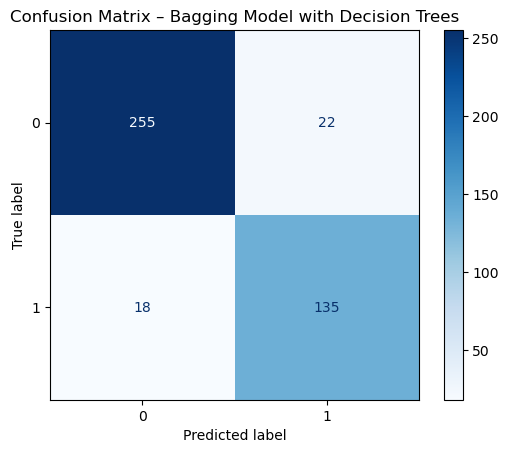

<Figure size 640x480 with 0 Axes>

2 trees → Test Accuracy: 0.9047
Best number of trees: 1 with accuracy 0.9070


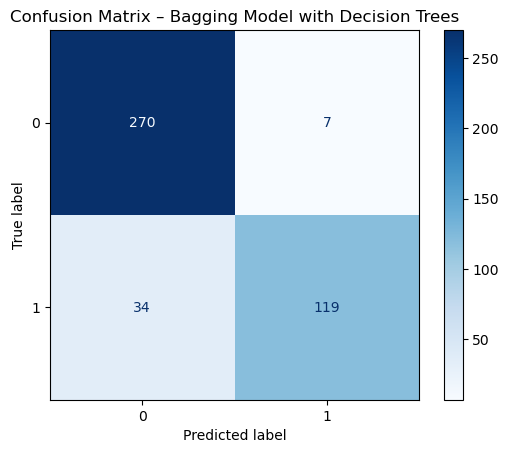

<Figure size 640x480 with 0 Axes>

3 trees → Test Accuracy: 0.9302
Best number of trees: 3 with accuracy 0.9302


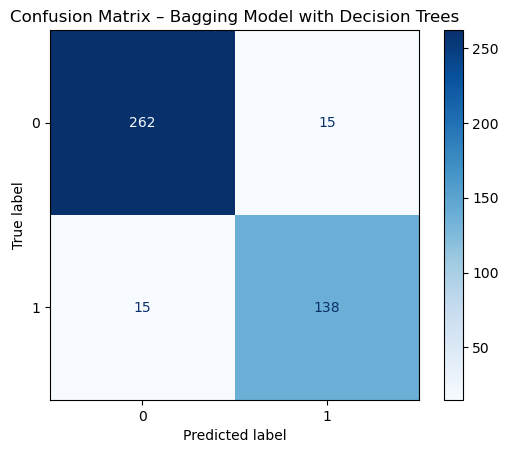

<Figure size 640x480 with 0 Axes>

4 trees → Test Accuracy: 0.9186
Best number of trees: 3 with accuracy 0.9302


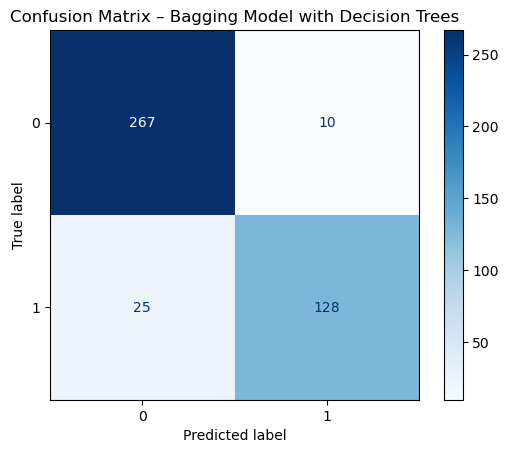

<Figure size 640x480 with 0 Axes>

5 trees → Test Accuracy: 0.9395
Best number of trees: 5 with accuracy 0.9395


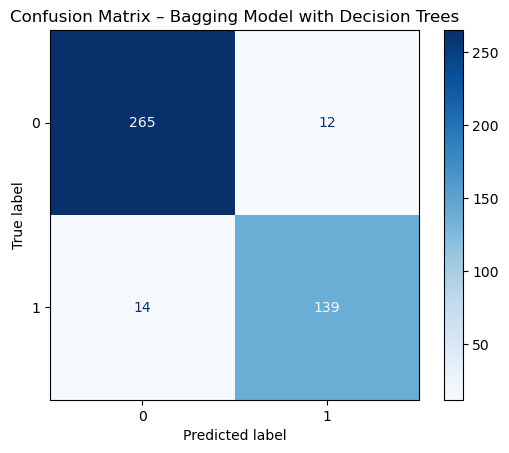

<Figure size 640x480 with 0 Axes>

6 trees → Test Accuracy: 0.9163
Best number of trees: 5 with accuracy 0.9395


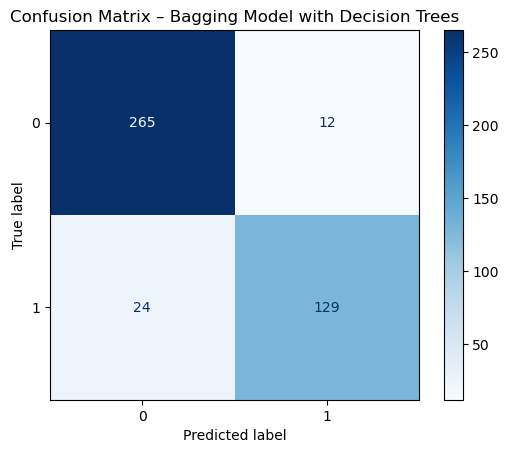

<Figure size 640x480 with 0 Axes>

7 trees → Test Accuracy: 0.9302
Best number of trees: 5 with accuracy 0.9395


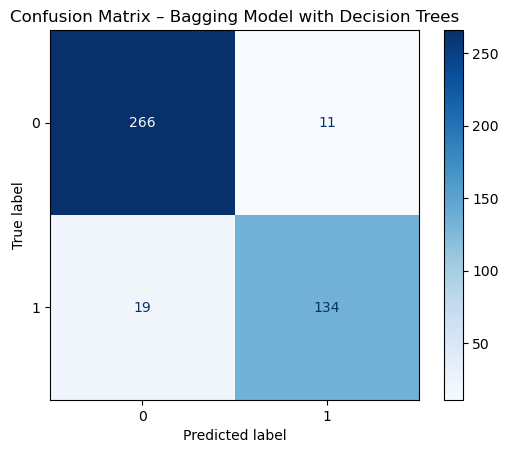

<Figure size 640x480 with 0 Axes>

8 trees → Test Accuracy: 0.9442
Best number of trees: 8 with accuracy 0.9442


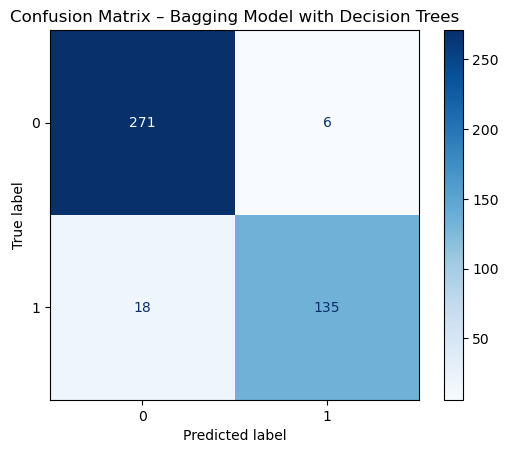

<Figure size 640x480 with 0 Axes>

9 trees → Test Accuracy: 0.9395
Best number of trees: 8 with accuracy 0.9442


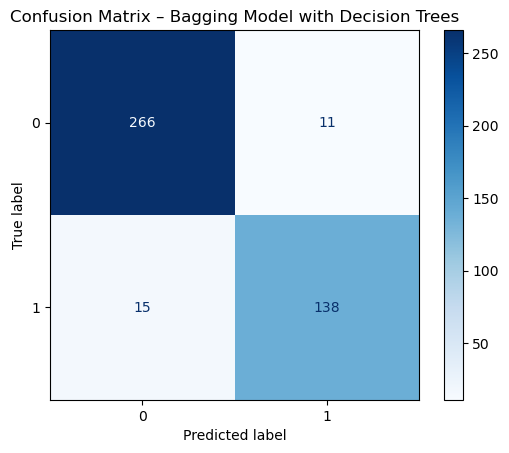

<Figure size 640x480 with 0 Axes>

10 trees → Test Accuracy: 0.9465
Best number of trees: 10 with accuracy 0.9465


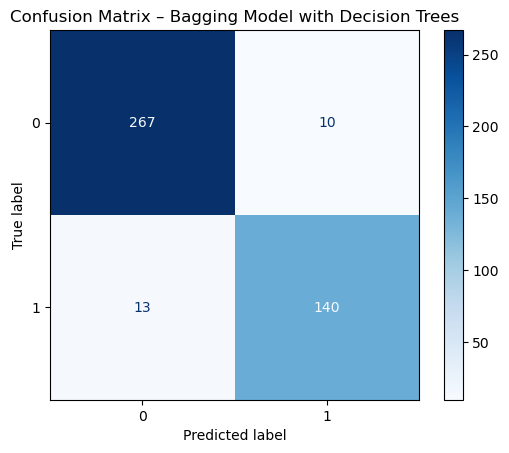

<Figure size 640x480 with 0 Axes>

11 trees → Test Accuracy: 0.9233
Best number of trees: 10 with accuracy 0.9465


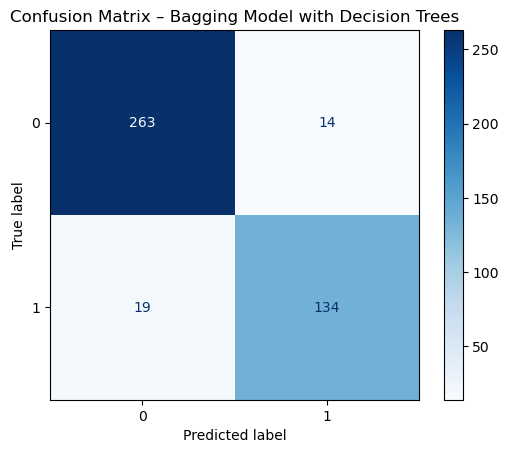

<Figure size 640x480 with 0 Axes>

12 trees → Test Accuracy: 0.9442
Best number of trees: 10 with accuracy 0.9465


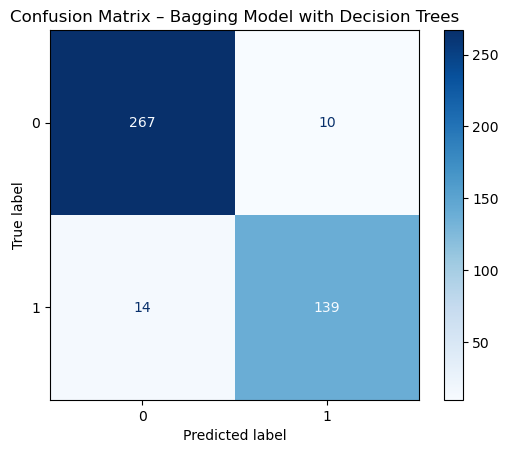

<Figure size 640x480 with 0 Axes>

13 trees → Test Accuracy: 0.9395
Best number of trees: 10 with accuracy 0.9465


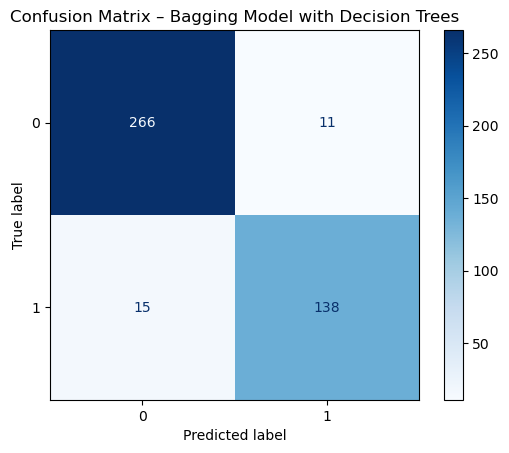

<Figure size 640x480 with 0 Axes>

14 trees → Test Accuracy: 0.9465
Best number of trees: 10 with accuracy 0.9465


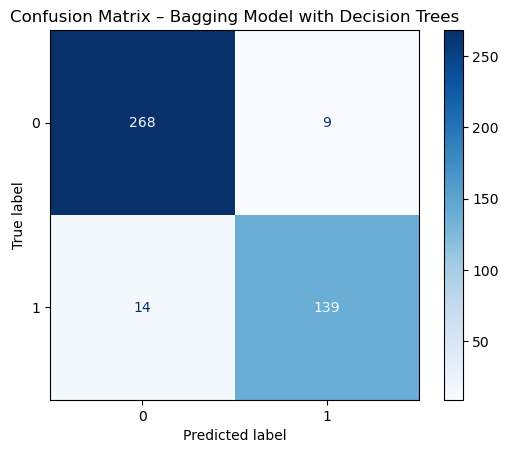

<Figure size 640x480 with 0 Axes>

15 trees → Test Accuracy: 0.9442
Best number of trees: 10 with accuracy 0.9465


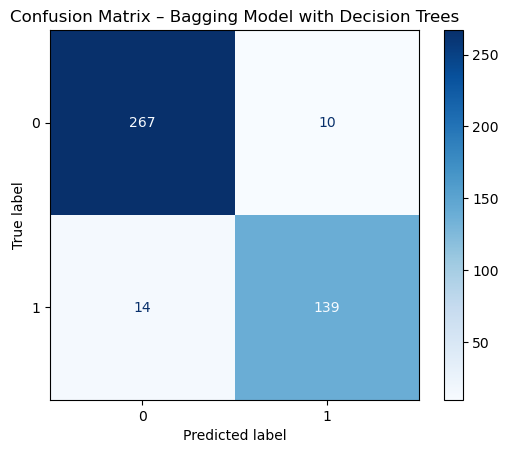

<Figure size 640x480 with 0 Axes>

16 trees → Test Accuracy: 0.9488
Best number of trees: 16 with accuracy 0.9488


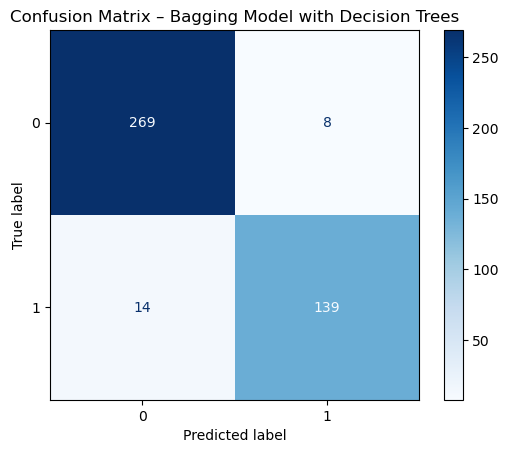

<Figure size 640x480 with 0 Axes>

17 trees → Test Accuracy: 0.9442
Best number of trees: 16 with accuracy 0.9488


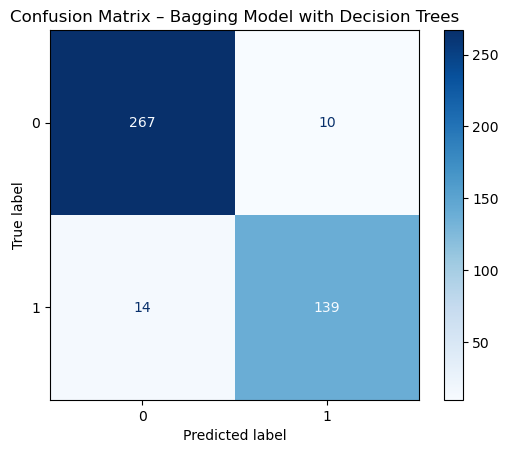

<Figure size 640x480 with 0 Axes>

18 trees → Test Accuracy: 0.9442
Best number of trees: 16 with accuracy 0.9488


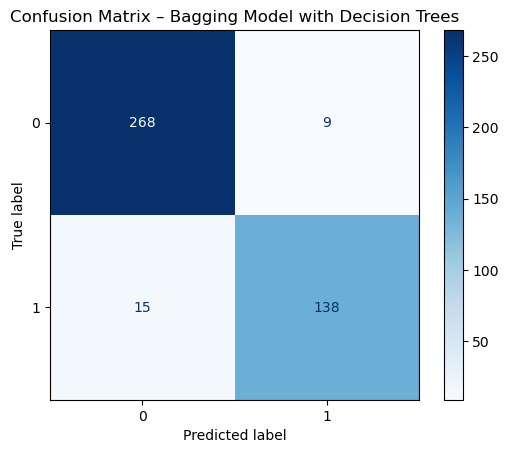

<Figure size 640x480 with 0 Axes>

19 trees → Test Accuracy: 0.9442
Best number of trees: 16 with accuracy 0.9488


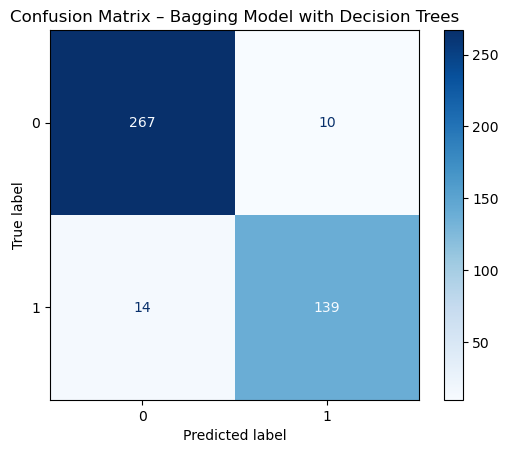

<Figure size 640x480 with 0 Axes>

20 trees → Test Accuracy: 0.9465
Best number of trees: 16 with accuracy 0.9488


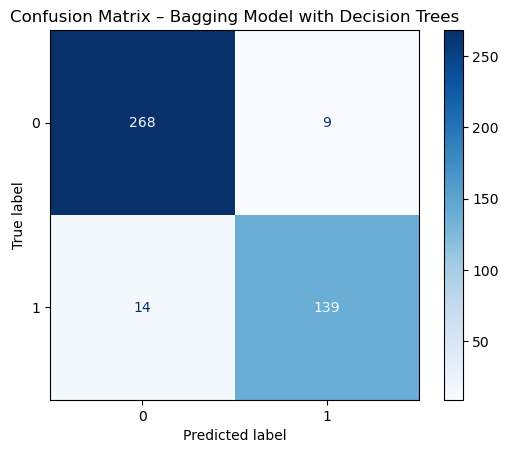

<Figure size 640x480 with 0 Axes>

21 trees → Test Accuracy: 0.9465
Best number of trees: 16 with accuracy 0.9488


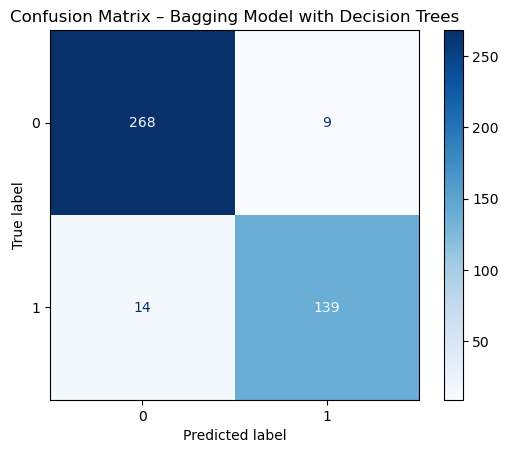

<Figure size 640x480 with 0 Axes>

22 trees → Test Accuracy: 0.9465
Best number of trees: 16 with accuracy 0.9488


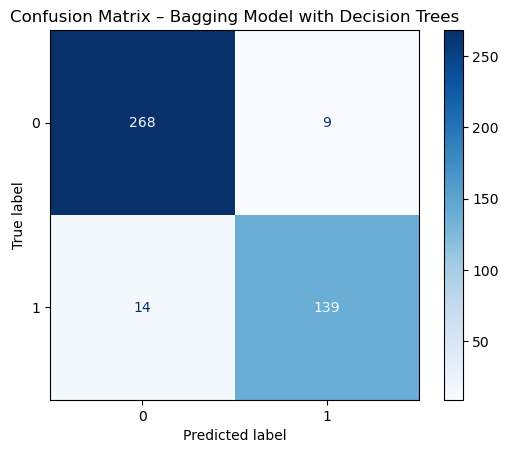

<Figure size 640x480 with 0 Axes>

23 trees → Test Accuracy: 0.9395
Best number of trees: 16 with accuracy 0.9488


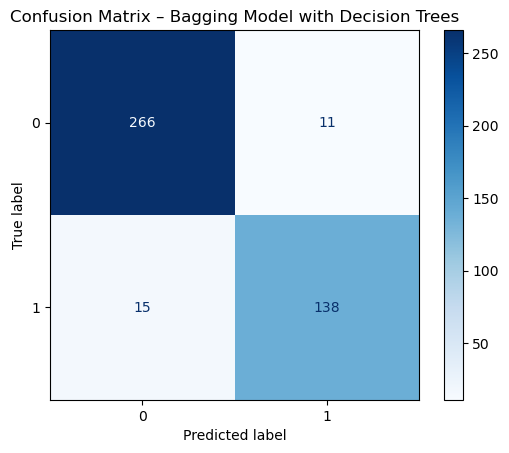

<Figure size 640x480 with 0 Axes>

24 trees → Test Accuracy: 0.9372
Best number of trees: 16 with accuracy 0.9488


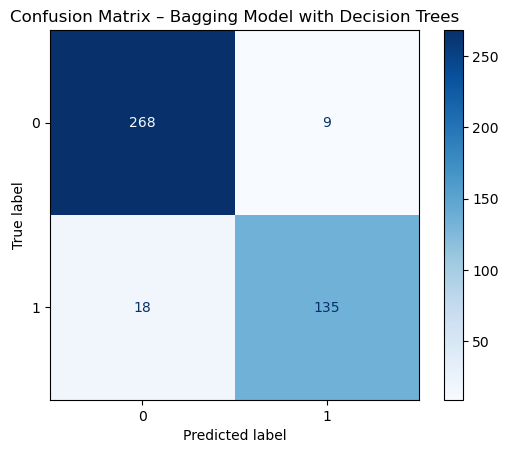

<Figure size 640x480 with 0 Axes>

25 trees → Test Accuracy: 0.9395
Best number of trees: 16 with accuracy 0.9488


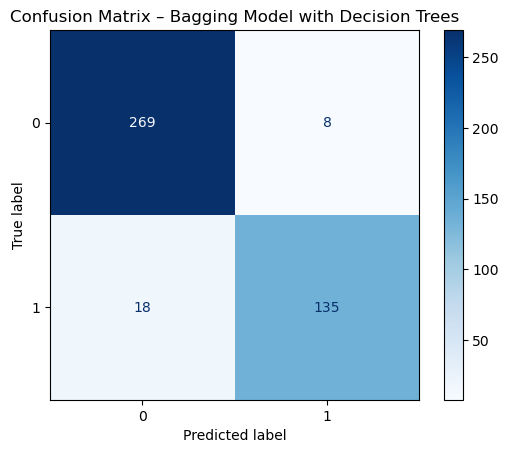

<Figure size 640x480 with 0 Axes>

26 trees → Test Accuracy: 0.9465
Best number of trees: 16 with accuracy 0.9488


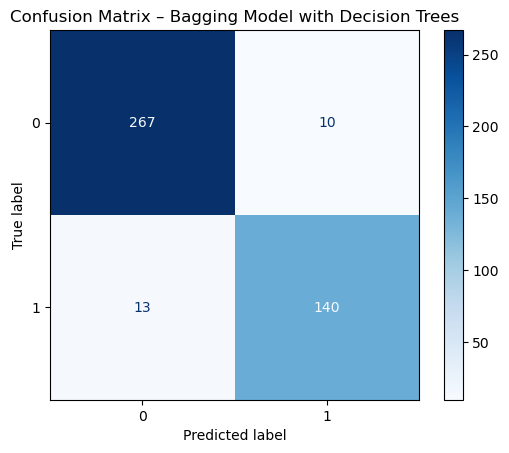

<Figure size 640x480 with 0 Axes>

27 trees → Test Accuracy: 0.9419
Best number of trees: 16 with accuracy 0.9488


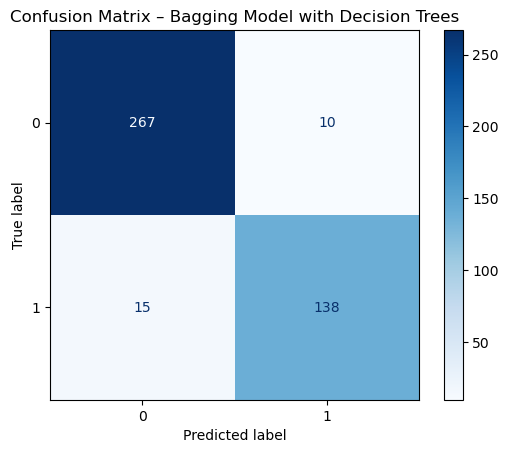

<Figure size 640x480 with 0 Axes>

28 trees → Test Accuracy: 0.9465
Best number of trees: 16 with accuracy 0.9488


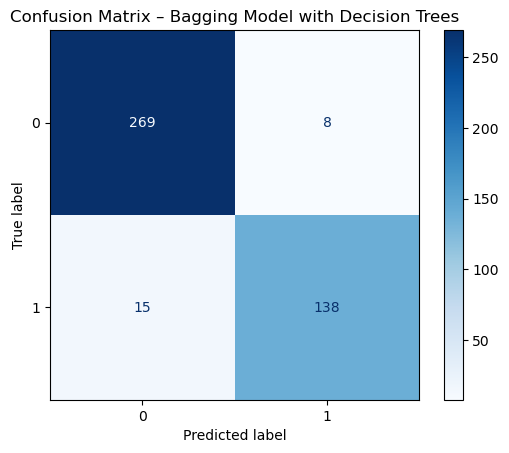

<Figure size 640x480 with 0 Axes>

29 trees → Test Accuracy: 0.9442
Best number of trees: 16 with accuracy 0.9488


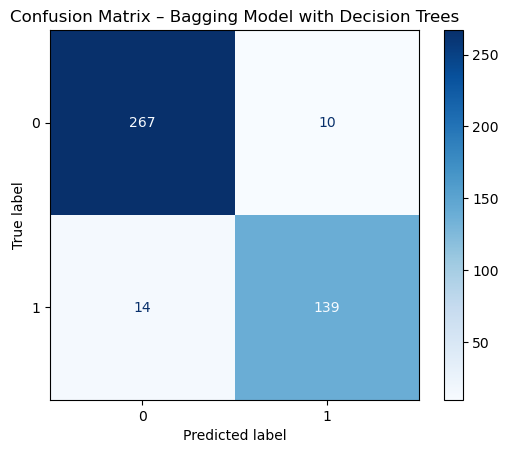

<Figure size 640x480 with 0 Axes>

30 trees → Test Accuracy: 0.9442
Best number of trees: 16 with accuracy 0.9488


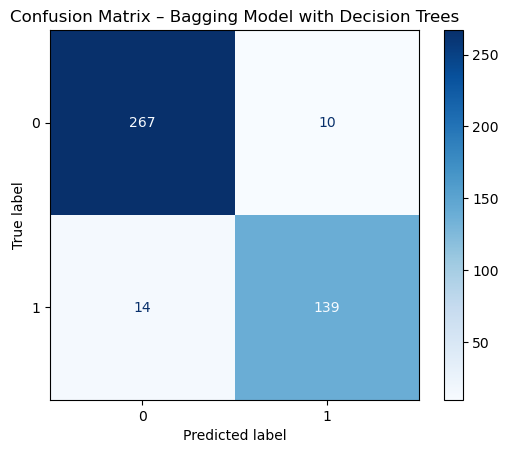

<Figure size 640x480 with 0 Axes>

In [212]:
# Split into 80% training and 20% testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Bagging with tree
results = {}

for n in [1,2,3,4,5, 6, 7, 8, 9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]:
    models = []
    all_preds = []

    for i in range(n):
        #Create a bootstrap sample from 80% training data
        indices = np.random.choice(len(x_train), size=len(x_train), replace=True)
        x_sample = x_train.iloc[indices]
        y_sample = y_train.iloc[indices]

        # Train model on the bootstrap sample
        model = DecisionTreeClassifier(random_state=42)
        model.fit(x_sample, y_sample)
        models.append(model)

        # Weighted model
        #model_weighted = DecisionTreeClassifier(max_depth=15,random_state=42)
        model_weighted = DecisionTreeClassifier(max_depth=15,class_weight='balanced',random_state=42)
        #model_weighted = DecisionTreeClassifier(max_depth=15, min_samples_split=10,min_samples_leaf=5,class_weight='balanced',random_state=42)
        model_weighted.fit(x_train, y_train)
        preds_weighted = model_weighted.predict(x_test)

        # Predict on 20% test data
        preds = model.predict(x_test)
        all_preds.append(preds)

    # Majority vote across all trees
    all_preds = np.array(all_preds).T
    final_preds = mode(all_preds, axis=1).mode.ravel()
    # Evaluate on test set
    acc = accuracy_score(y_test, final_preds)
    results[n] = acc
    print(f"{n} trees → Test Accuracy: {acc:.4f}")
    best_n = max(results, key=results.get)
    print(f"Best number of trees: {best_n} with accuracy {results[best_n]:.4f}")
    
    from sklearn.metrics import ConfusionMatrixDisplay

    ConfusionMatrixDisplay.from_predictions(y_test, final_preds, cmap='Blues')
    plt.title("Confusion Matrix – Bagging Model with Decision Trees")
    plt.show()
    plt.tight_layout()
    plt.show()

In [217]:
 best_n = max(results, key=results.get)
 print(f"Best number of trees: {best_n} with accuracy {results[best_n]:.4f}")

Best number of trees: 16 with accuracy 0.9488


In [222]:
cm = confusion_matrix(y_test, final_preds)
print(cm)
TN, FP, FN, TP = cm.ravel()

accuracy  = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall    = TP / (TP + FN)
f1_score  = 2 * (precision * recall) / (precision + recall)
fnr = FN / (FN + TP)

print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1_score:.2f}")
print(f"False Negative Rate: {fnr:.4f}")

[[267  10]
 [ 14 139]]
Accuracy:  0.94
Precision: 0.93
Recall:    0.91
F1 Score:  0.92
False Negative Rate: 0.0915


When I compared the model using only the top 5 selected features to the model trained on all features, I found that the performance was quite similar.
Because I used bagging with bootstrapping, the model could handle all of that extra input without overfitting and still be accurate.

In [ ]:
The best overall performance came from the model trained on the oversampled dataset, with an accuracy of about 98% and a very low false negative rate under 1%. This model was the most effective at catching almost all true Alzheimer’s cases.
The model trained using only the top 5 selected features also performed really well, with 95% accuracy. But the False Negative about 8-10% so the model missed true Alzhimer’s cases
The model using all features achieved 94% accuracy, which is still strong. However, the False Negative was about 10% so the model missed true Alzhimer’s cases.
Overall, I found that combining oversampling, feature selection, and bagging with bootstrapping led to consistently strong results. 